In [1]:
import polars as pl
import seaborn as sns
import json

In [2]:
# read the transaction CSV
df = pl.read_csv("transactions_data.csv")

In [3]:
# read the json file containing mcc codes
with open("mcc_codes.json" , "r") as f:
    json_data = json.load(f)

json_list = [[] , []]
for key, value in json_data.items():
    json_list[0].append(key)
    json_list[1].append(value)

df_mcc_codes = pl.DataFrame({"mcc" : json_list[0] , "merchant_category" : json_list[1]} , schema={"mcc" : pl.Int64 , "merchant_category" : pl.String} , strict=False)

In [4]:
# construct the final dataframe by joining the mcc_codes to it
df = df.join(other=df_mcc_codes , on="mcc", how="left")

In [5]:
df.shape

(13305915, 13)

In [6]:
df.describe()

statistic,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category
str,f64,str,f64,f64,str,str,f64,str,str,f64,f64,str,str
"""count""",1.3305915e7,"""13305915""",1.3305915e7,1.3305915e7,"""13305915""","""13305915""",1.3305915e7,"""13305915""","""11742215""",1.1653209e7,1.3305915e7,"""211393""","""13305915"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""1563700""",1.652706e6,0.0,"""13094522""","""0"""
"""mean""",1.5584e7,null,1026.812046,3475.267651,null,null,47723.763181,null,null,51327.819831,5565.439815,null,null
"""std""",4.7045e6,null,581.638559,1674.355912,null,null,25815.337691,null,null,29404.225234,875.700238,null,null
"""min""",7.475327e6,"""2010-01-01 00:01:00""",0.0,0.0,"""$-0.00""","""Chip Transaction""",1.0,"""Aaronsburg""","""AA""",1001.0,1711.0,"""Bad CVV""","""Accounting, Auditing, and Book…"
"""25%""",1.1506045e7,null,519.0,2413.0,null,null,25887.0,null,null,28602.0,5300.0,null,null
"""50%""",1.5570866e7,null,1070.0,3584.0,null,null,45926.0,null,null,47670.0,5499.0,null,null
"""75%""",1.9653606e7,null,1531.0,4901.0,null,null,67570.0,null,null,77901.0,5812.0,null,null
"""max""",2.3761874e7,"""2019-10-31 23:59:00""",1998.0,6144.0,"""$999.97""","""Swipe Transaction""",100342.0,"""Zwolle""","""Zimbabwe""",99928.0,9402.0,"""Technical Glitch""","""Women's Ready-To-Wear Stores"""


In [7]:
df.glimpse(max_items_per_column=10)

Rows: 13305915
Columns: 13
$ id                <i64> 7475327, 7475328, 7475329, 7475331, 7475332, 7475333, 7475334, 7475335, 7475336, 7475337
$ date              <str> '2010-01-01 00:01:00', '2010-01-01 00:02:00', '2010-01-01 00:02:00', '2010-01-01 00:05:00', '2010-01-01 00:06:00', '2010-01-01 00:07:00', '2010-01-01 00:09:00', '2010-01-01 00:14:00', '2010-01-01 00:21:00', '2010-01-01 00:21:00'
$ client_id         <i64> 1556, 561, 1129, 430, 848, 1807, 1556, 1684, 335, 351
$ card_id           <i64> 2972, 4575, 102, 2860, 3915, 165, 2972, 2140, 5131, 1112
$ amount            <str> '$-77.00', '$14.57', '$80.00', '$200.00', '$46.41', '$4.81', '$77.00', '$26.46', '$261.58', '$10.74'
$ use_chip          <str> 'Swipe Transaction', 'Swipe Transaction', 'Swipe Transaction', 'Swipe Transaction', 'Swipe Transaction', 'Swipe Transaction', 'Swipe Transaction', 'Online Transaction', 'Online Transaction', 'Swipe Transaction'
$ merchant_id       <i64> 59935, 67570, 27092, 27092, 13051, 20519, 59935, 3

In [8]:
df.select(pl.all().n_unique())

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
13305915,4136496,1219,4071,81161,3,74831,12492,200,25257,109,23,108


In [9]:
# This can be used for a visualization of different amounts of transactions
df_chip_usage = df.get_column("use_chip").value_counts()
df.get_column("use_chip").value_counts()

use_chip,count
str,u32
"""Online Transaction""",1557912
"""Chip Transaction""",4780818
"""Swipe Transaction""",6967185


In [10]:
df.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category
i64,str,i64,i64,str,str,i64,str,str,f64,i64,str,str
7475327,"""2010-01-01 00:01:00""",1556,2972,"""$-77.00""","""Swipe Transaction""",59935,"""Beulah""","""ND""",58523.0,5499,null,"""Miscellaneous Food Stores"""
7475328,"""2010-01-01 00:02:00""",561,4575,"""$14.57""","""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722.0,5311,null,"""Department Stores"""
7475329,"""2010-01-01 00:02:00""",1129,102,"""$80.00""","""Swipe Transaction""",27092,"""Vista""","""CA""",92084.0,4829,null,"""Money Transfer"""
7475331,"""2010-01-01 00:05:00""",430,2860,"""$200.00""","""Swipe Transaction""",27092,"""Crown Point""","""IN""",46307.0,4829,null,"""Money Transfer"""
7475332,"""2010-01-01 00:06:00""",848,3915,"""$46.41""","""Swipe Transaction""",13051,"""Harwood""","""MD""",20776.0,5813,null,"""Drinking Places (Alcoholic Bev…"


In [11]:
df.tail()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category
i64,str,i64,i64,str,str,i64,str,str,f64,i64,str,str
23761868,"""2019-10-31 23:56:00""",1718,2379,"""$1.11""","""Chip Transaction""",86438,"""West Covina""","""CA""",91792.0,5499,null,"""Miscellaneous Food Stores"""
23761869,"""2019-10-31 23:56:00""",1766,2066,"""$12.80""","""Online Transaction""",39261,"""ONLINE""",null,null,5815,null,"""Digital Goods - Media, Books, …"
23761870,"""2019-10-31 23:57:00""",199,1031,"""$40.44""","""Swipe Transaction""",2925,"""Allen""","""TX""",75002.0,4900,null,"""Utilities - Electric, Gas, Wat…"
23761873,"""2019-10-31 23:58:00""",1986,5443,"""$4.00""","""Chip Transaction""",46284,"""Daly City""","""CA""",94014.0,5411,null,"""Grocery Stores, Supermarkets"""
23761874,"""2019-10-31 23:59:00""",489,5697,"""$12.88""","""Chip Transaction""",24658,"""Greenbrier""","""TN""",37073.0,5921,null,"""Package Stores, Beer, Wine, Li…"


## Data Cleaning

### Set data type of attribute "date"

In [12]:
df = df.with_columns(
    pl.col("date").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S").alias("date")
)

In [13]:
df = df.with_columns(
    pl.col("date").dt.date().alias("date")
)

### Cast attribute zip to integer

In [14]:
df = df.cast({"zip":pl.Int64})

### Split amount into Debit and Credit

In [15]:
df = df.with_columns(
    pl.col("amount").str.replace_all("$","" , literal=True).alias("amount")
)

In [16]:
df = df.cast({"amount" : pl.Float32})

In [17]:
df = df.with_columns(
    pl.when(pl.col("amount") < 0).then(pl.col("amount")).fill_null(0).alias("debit")
    ,pl.when(pl.col("amount") >= 0).then(pl.col("amount")).fill_null(0).alias("credit")
    , pl.when(pl.col("amount") < 0).then(0).otherwise(1).fill_null(0).alias("in_out_flag")
)

In [18]:
df.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category,debit,credit,in_out_flag
i64,date,i64,i64,f32,str,i64,str,str,i64,i64,str,str,f32,f32,i32
7475327,2010-01-01,1556,2972,-77.0,"""Swipe Transaction""",59935,"""Beulah""","""ND""",58523,5499,null,"""Miscellaneous Food Stores""",-77.0,0.0,0
7475328,2010-01-01,561,4575,14.57,"""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722,5311,null,"""Department Stores""",0.0,14.57,1
7475329,2010-01-01,1129,102,80.0,"""Swipe Transaction""",27092,"""Vista""","""CA""",92084,4829,null,"""Money Transfer""",0.0,80.0,1
7475331,2010-01-01,430,2860,200.0,"""Swipe Transaction""",27092,"""Crown Point""","""IN""",46307,4829,null,"""Money Transfer""",0.0,200.0,1
7475332,2010-01-01,848,3915,46.41,"""Swipe Transaction""",13051,"""Harwood""","""MD""",20776,5813,null,"""Drinking Places (Alcoholic Bev…",0.0,46.41,1


# Analysis

## Show Pairplot

### Show Distributions of payments in total

In [19]:
df.select(pl.col("amount").min())

amount
f32
-500.0


In [20]:
df.select(pl.col("amount").max())

amount
f32
6820.200195


In [21]:
print(df.select(pl.col("amount")))

shape: (13_305_915, 1)
┌───────────┐
│ amount    │
│ ---       │
│ f32       │
╞═══════════╡
│ -77.0     │
│ 14.57     │
│ 80.0      │
│ 200.0     │
│ 46.41     │
│ …         │
│ 1.11      │
│ 12.8      │
│ 40.439999 │
│ 4.0       │
│ 12.88     │
└───────────┘


In [22]:
print(df.select(pl.col("amount").std()))

shape: (1, 1)
┌───────────┐
│ amount    │
│ ---       │
│ f32       │
╞═══════════╡
│ 81.655746 │
└───────────┘


<Axes: xlabel='amount'>

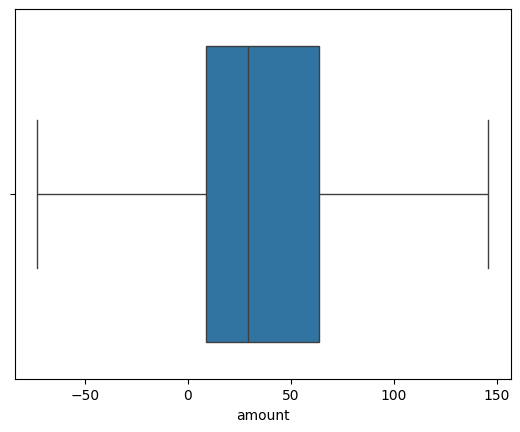

In [23]:
sns.boxplot(df , x="amount" , showfliers=False)

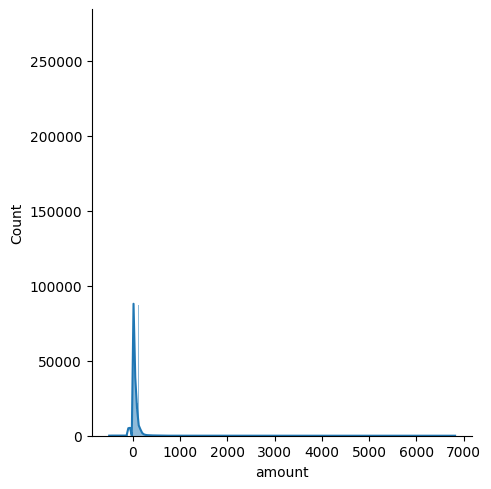

In [42]:
sns.displot(df , x="amount" , kde="True")

## Split Data into eacg chip_usage

In [25]:
df_chip_usage = (
    df.group_by(["date", "use_chip"]).agg([
        pl.col("debit").sum().alias("debit"),
        pl.col("credit").sum().alias("credit")
    ])
)

In [26]:
print(df_chip_usage)

shape: (8_946, 4)
┌────────────┬────────────────────┬──────────┬───────────────┐
│ date       ┆ use_chip           ┆ debit    ┆ credit        │
│ ---        ┆ ---                ┆ ---      ┆ ---           │
│ date       ┆ str                ┆ f32      ┆ f32           │
╞════════════╪════════════════════╪══════════╪═══════════════╡
│ 2012-07-12 ┆ Online Transaction ┆ -470.0   ┆ 23290.535156  │
│ 2015-11-05 ┆ Online Transaction ┆ -363.0   ┆ 26540.630859  │
│ 2019-05-21 ┆ Chip Transaction   ┆ -13294.0 ┆ 121313.523438 │
│ 2011-09-17 ┆ Online Transaction ┆ -1225.0  ┆ 25473.505859  │
│ 2013-11-15 ┆ Swipe Transaction  ┆ -16505.0 ┆ 155738.46875  │
│ …          ┆ …                  ┆ …        ┆ …             │
│ 2013-12-22 ┆ Online Transaction ┆ 0.0      ┆ 23126.673828  │
│ 2016-08-21 ┆ Swipe Transaction  ┆ -2877.0  ┆ 25818.169922  │
│ 2010-07-14 ┆ Online Transaction ┆ -328.0   ┆ 18980.210938  │
│ 2015-10-23 ┆ Swipe Transaction  ┆ -6956.0  ┆ 31475.837891  │
│ 2016-11-06 ┆ Online Transaction ┆ -

### Calculate Metrics

In [27]:
# Location
df_location = df_chip_usage.select(pl.mean("debit").alias("mean_debit"), pl.mean("credit").alias("mean_credit"), pl.median("debit").alias("median_debit"), pl.median("credit").alias("median_credit"))

In [28]:
df_location.head()

mean_debit,mean_credit,median_debit,median_credit
f32,f32,f32,f32
-7547.400391,71468.203125,-3664.5,30574.830078


In [29]:
chip_usage_debit_mode = df_chip_usage.select(pl.col("debit").mode())
chip_usage_debit_mode.head()

debit
f32
0.0


In [30]:
chip_usage_credit_mode = df_chip_usage.select(pl.col("credit").mode())
chip_usage_credit_mode

credit
f32
22023.351562
26328.373047
20769.064453


In [31]:
# Standard Deviation and Variance
chip_usage_var_std = df_chip_usage.select(pl.col("debit").std().alias("std_debit") , pl.col("credit").std().alias("std_credit") , pl.var("debit").alias("var_debit") , pl.var("credit").alias("var_credit"))
print(chip_usage_var_std)

shape: (1, 4)
┌─────────────┬──────────────┬─────────────┬────────────┐
│ std_debit   ┆ std_credit   ┆ var_debit   ┆ var_credit │
│ ---         ┆ ---          ┆ ---         ┆ ---        │
│ f32         ┆ f32          ┆ f32         ┆ f32        │
╞═════════════╪══════════════╪═════════════╪════════════╡
│ 7783.574219 ┆ 55215.542969 ┆ 6.0584024e7 ┆ 3.0488e9   │
└─────────────┴──────────────┴─────────────┴────────────┘


### Show Distributions of credit/debit per day

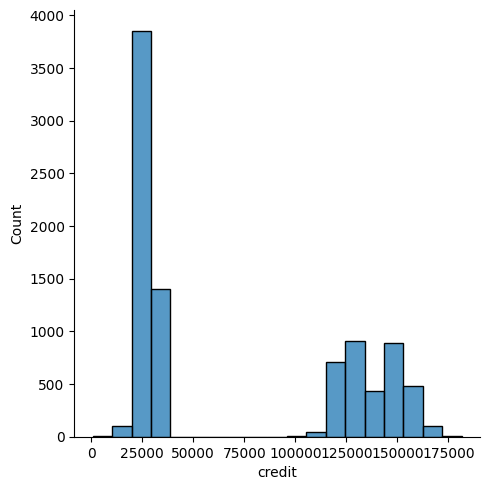

In [32]:
sns.displot(df_chip_usage , x="credit")

In [33]:
print(df_chip_usage.filter(pl.col("debit") < 0))

shape: (7_997, 4)
┌────────────┬────────────────────┬──────────┬───────────────┐
│ date       ┆ use_chip           ┆ debit    ┆ credit        │
│ ---        ┆ ---                ┆ ---      ┆ ---           │
│ date       ┆ str                ┆ f32      ┆ f32           │
╞════════════╪════════════════════╪══════════╪═══════════════╡
│ 2012-07-12 ┆ Online Transaction ┆ -470.0   ┆ 23290.535156  │
│ 2015-11-05 ┆ Online Transaction ┆ -363.0   ┆ 26540.630859  │
│ 2019-05-21 ┆ Chip Transaction   ┆ -13294.0 ┆ 121313.523438 │
│ 2011-09-17 ┆ Online Transaction ┆ -1225.0  ┆ 25473.505859  │
│ 2013-11-15 ┆ Swipe Transaction  ┆ -16505.0 ┆ 155738.46875  │
│ …          ┆ …                  ┆ …        ┆ …             │
│ 2015-06-17 ┆ Swipe Transaction  ┆ -3505.0  ┆ 30020.984375  │
│ 2016-08-21 ┆ Swipe Transaction  ┆ -2877.0  ┆ 25818.169922  │
│ 2010-07-14 ┆ Online Transaction ┆ -328.0   ┆ 18980.210938  │
│ 2015-10-23 ┆ Swipe Transaction  ┆ -6956.0  ┆ 31475.837891  │
│ 2016-11-06 ┆ Online Transaction ┆ -

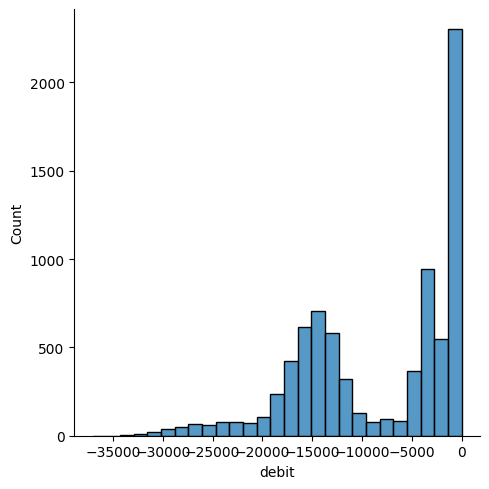

In [34]:
sns.displot(df_chip_usage.filter(pl.col("debit") < 0) , x="debit")

## Count the payments per day

In [35]:
df_nunique = df.select(pl.all().n_unique())
df_nunique.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category,debit,credit,in_out_flag
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
13305915,3591,1219,4071,81160,3,74831,12492,200,25257,109,23,108,598,80563,2


In [36]:
df_count_per_day = df.with_columns(
    pl.lit(1).alias("counter")
)

In [37]:
df_count_per_day.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category,debit,credit,in_out_flag,counter
i64,date,i64,i64,f32,str,i64,str,str,i64,i64,str,str,f32,f32,i32,i32
7475327,2010-01-01,1556,2972,-77.0,"""Swipe Transaction""",59935,"""Beulah""","""ND""",58523,5499,null,"""Miscellaneous Food Stores""",-77.0,0.0,0,1
7475328,2010-01-01,561,4575,14.57,"""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722,5311,null,"""Department Stores""",0.0,14.57,1,1
7475329,2010-01-01,1129,102,80.0,"""Swipe Transaction""",27092,"""Vista""","""CA""",92084,4829,null,"""Money Transfer""",0.0,80.0,1,1
7475331,2010-01-01,430,2860,200.0,"""Swipe Transaction""",27092,"""Crown Point""","""IN""",46307,4829,null,"""Money Transfer""",0.0,200.0,1,1
7475332,2010-01-01,848,3915,46.41,"""Swipe Transaction""",13051,"""Harwood""","""MD""",20776,5813,null,"""Drinking Places (Alcoholic Bev…",0.0,46.41,1,1


In [38]:
df_count_per_day = df_count_per_day.with_columns(
    pl.col("date").dt.date().alias("date")
)

In [39]:
df_count_per_day.head()

id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,merchant_category,debit,credit,in_out_flag,counter
i64,date,i64,i64,f32,str,i64,str,str,i64,i64,str,str,f32,f32,i32,i32
7475327,2010-01-01,1556,2972,-77.0,"""Swipe Transaction""",59935,"""Beulah""","""ND""",58523,5499,null,"""Miscellaneous Food Stores""",-77.0,0.0,0,1
7475328,2010-01-01,561,4575,14.57,"""Swipe Transaction""",67570,"""Bettendorf""","""IA""",52722,5311,null,"""Department Stores""",0.0,14.57,1,1
7475329,2010-01-01,1129,102,80.0,"""Swipe Transaction""",27092,"""Vista""","""CA""",92084,4829,null,"""Money Transfer""",0.0,80.0,1,1
7475331,2010-01-01,430,2860,200.0,"""Swipe Transaction""",27092,"""Crown Point""","""IN""",46307,4829,null,"""Money Transfer""",0.0,200.0,1,1
7475332,2010-01-01,848,3915,46.41,"""Swipe Transaction""",13051,"""Harwood""","""MD""",20776,5813,null,"""Drinking Places (Alcoholic Bev…",0.0,46.41,1,1


In [40]:
df_count_per_day.group_by("date").agg(pl.col("counter").sum())

date,counter
date,i32
2014-11-28,3837
2019-07-28,3967
2010-03-16,3397
2012-10-03,3639
2016-04-23,3500
…,…
2017-05-09,3879
2014-10-20,3776
2011-12-28,3627


In [41]:
print(df_count_per_day)

shape: (13_305_915, 17)
┌──────────┬────────────┬───────────┬─────────┬───┬───────┬───────────┬─────────────┬─────────┐
│ id       ┆ date       ┆ client_id ┆ card_id ┆ … ┆ debit ┆ credit    ┆ in_out_flag ┆ counter │
│ ---      ┆ ---        ┆ ---       ┆ ---     ┆   ┆ ---   ┆ ---       ┆ ---         ┆ ---     │
│ i64      ┆ date       ┆ i64       ┆ i64     ┆   ┆ f32   ┆ f32       ┆ i32         ┆ i32     │
╞══════════╪════════════╪═══════════╪═════════╪═══╪═══════╪═══════════╪═════════════╪═════════╡
│ 7475327  ┆ 2010-01-01 ┆ 1556      ┆ 2972    ┆ … ┆ -77.0 ┆ 0.0       ┆ 0           ┆ 1       │
│ 7475328  ┆ 2010-01-01 ┆ 561       ┆ 4575    ┆ … ┆ 0.0   ┆ 14.57     ┆ 1           ┆ 1       │
│ 7475329  ┆ 2010-01-01 ┆ 1129      ┆ 102     ┆ … ┆ 0.0   ┆ 80.0      ┆ 1           ┆ 1       │
│ 7475331  ┆ 2010-01-01 ┆ 430       ┆ 2860    ┆ … ┆ 0.0   ┆ 200.0     ┆ 1           ┆ 1       │
│ 7475332  ┆ 2010-01-01 ┆ 848       ┆ 3915    ┆ … ┆ 0.0   ┆ 46.41     ┆ 1           ┆ 1       │
│ …        ┆ …  